<a href="https://colab.research.google.com/github/ArunthathiJayakumar/CN/blob/main/Copy_of_Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Implementation of VGG16 with Transfer learning for Image Classification - Face Recognition***

Author: ARUNTHATHI K J


In [ ]:
import tensorflow as tf
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.utils import load_img

In [ ]:
lt = [cv2.ROTATE_180,cv2.ROTATE_90_COUNTERCLOCKWISE,cv2.ROTATE_90_CLOCKWISE]
def brightness(img):
    value = random.uniform(0.5, 2)
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv = np.array(hsv, dtype = np.float64)
    hsv[:,:,1] = hsv[:,:,1]*value
    hsv[:,:,1][hsv[:,:,1]>255]  = 255
    hsv[:,:,2] = hsv[:,:,2]*value
    hsv[:,:,2][hsv[:,:,2]>255]  = 255
    hsv = np.array(hsv, dtype = np.uint8)
    img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return img

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#assigning directory
import pathlib
import glob
directory=pathlib.Path("/content/drive/My Drive/My")
import pathlib
import glob
directory=pathlib.Path("/content/drive/My Drive/My")

In [ ]:
resultant="/content/augmentedimages"

In [ ]:
items = os.listdir(directory)

classes=[]
count=0
images = []
labels=[]
for i in items:
    i1 = 0
    print(i)
    classes.append(i)
    path1 = f"{directory}/{i}"
    a = random.randint(5,10)
    img = cv2.imread(path1)
    img = cv2.resize(img,(224,224))
    k = i.split(".")[0]
    cv2.imwrite(f"{resultant}\{k}{i1}.png",img)

    i1+=1
    while a!=0:
        img = cv2.rotate(img,lt[random.randint(0,2)])
        images.append(img)
        cv2.imwrite(f"{resultant}\{k}{i1}.png",img)
        i1+=1
        labels.append(count)
        if a%2==0:
            img = brightness(img)
            images.append(img)
            cv2.imwrite(f"{resultant}\{k}{i1}.png",img)
            i1+=1
            labels.append(count)
        a-=1
    count+=1
images = np.array(images)
labels = np.array(labels)

<>:16: SyntaxWarning: invalid escape sequence '\{'
<>:22: SyntaxWarning: invalid escape sequence '\{'
<>:28: SyntaxWarning: invalid escape sequence '\{'
<>:16: SyntaxWarning: invalid escape sequence '\{'
<>:22: SyntaxWarning: invalid escape sequence '\{'
<>:28: SyntaxWarning: invalid escape sequence '\{'
/tmp/ipython-input-2988038964.py:16: SyntaxWarning: invalid escape sequence '\{'
  cv2.imwrite(f"{resultant}\{k}{i1}.png",img)
/tmp/ipython-input-2988038964.py:22: SyntaxWarning: invalid escape sequence '\{'
  cv2.imwrite(f"{resultant}\{k}{i1}.png",img)
/tmp/ipython-input-2988038964.py:28: SyntaxWarning: invalid escape sequence '\{'
  cv2.imwrite(f"{resultant}\{k}{i1}.png",img)


bharatanatyam.jpg
pongal.jpg
Traditional-Kathakali-dance.jpg
onam.jpg


In [ ]:
images.shape

(47, 224, 224, 3)

In [ ]:
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import *
from keras.applications.vgg16 import VGG16, preprocess_input

In [ ]:
# change the model here for alternatives

model = VGG16(weights="imagenet")
for i in model.layers:
    i.trainable =  False

In [ ]:
len(model.layers)

23

In [ ]:
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 138,357,544 (527.79 MB)

**Apply Transfer learning to VGG16**

In [ ]:
transferVGG = Sequential()

# adding layers from pre-trained model
for i in range(18):
    transferVGG.add(model.layers[i])

In [ ]:
# adding custum layers
transferVGG.add(Flatten())
transferVGG.add(Dense(512,activation="relu"))
transferVGG.add(Dense(128,activation="relu"))
transferVGG.add(Dense(4,activation="softmax"))

In [ ]:
transferVGG.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 66,161,604 (252.39 MB)

 Trainable params: 51,446,916 (196.25 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        print("call")
        if(logs.get('accuracy') > .99):
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(99))
            self.model.stop_training = True
callbacks = myCallback()

In [ ]:
# model1.summary()
transferVGG.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
transferVGG.fit(images,labels,epochs=100,callbacks=[callbacks])

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.3484 - loss: 34.4553 call
2/2 ━━━━━━━━━━━━━━━━━━━━ 32s 10s/step - accuracy: 0.3812 - loss: 37.5967
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8418 - loss: 95.7678  call
2/2 ━━━━━━━━━━━━━━━━━━━━ 39s 10s/step - accuracy: 0.8307 - loss: 99.2006
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.8687 - loss: 6.9416  call
2/2 ━━━━━━━━━━━━━━━━━━━━ 30s 9s/step - accuracy: 0.8770 - loss: 6.5022
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 1.0000 - loss: 3.9167e-04  call

Reached 99.00% accuracy, so stopping training!!
2/2 ━━━━━━━━━━━━━━━━━━━━ 28s 9s/step - accuracy: 1.0000 - loss: 5.2223e-04


In [ ]:
transferVGG.evaluate(images,labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 27s 9s/step - accuracy: 1.0000 - loss: 0.0000e+00


[0.0, 1.0]

In [ ]:
def predict(i,transferVGG,labels):
    path1 = f"{directory}/{i}"
    img = cv2.imread(path1)
    img = cv2.resize(img,(224,224))
    a = np.argmax(transferVGG.predict(np.array([img])))
    img = cv2.putText(img, labels[a], (25,25), cv2.FONT_HERSHEY_SIMPLEX,1, (225,225,0), 3, cv2.LINE_AA)
    plt.imshow(img)

In [ ]:
#classes=["YESWANTH.jpg","VIKAS.jpg","TEJESWARREDDY.jpg","SAIDURGAKALYAN.jpg","RAMSAI.jpg","PAVANSIDDHU.jpg","NITHIBALAJI.jpg","ANTIBIOTICS .jpg","GAUTHAMSANKAR.jpg","CHANNAPATISAITEJA.jpg","AVIRAJ.jpg","ASAPUSAIKUMAR.jpg"]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 549ms/step


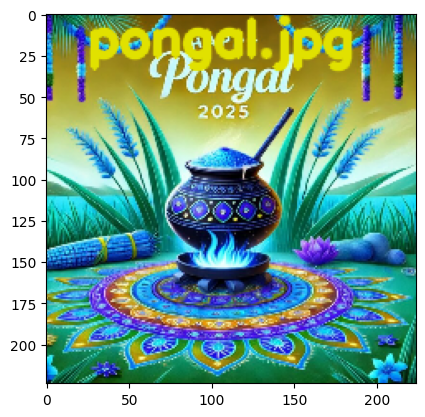

In [ ]:
predict("pongal.jpg",transferVGG,classes)